In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
df = pd.read_csv('titanic.csv')
df[:5]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
def calc_shares(target_filter, category_filter):
    target_count = target_filter.sum()

    total_count = len(target_filter)

    target_cat_count = (category_filter & target_filter).sum()

    cat_count = category_filter.sum()

    global_share = target_count/total_count
    cat_share = target_cat_count/cat_count
    share_mix = (target_count + target_cat_count) / (total_count + cat_count)

    return global_share, share_mix, cat_share

In [46]:
pd.DataFrame([
    ('class=Third',) + calc_shares(df.survived == 1, df['class'] == 'Third'),
    ('class=Second',) + calc_shares(df.survived == 1, df['class'] == 'Second'),
    ('class=First',) + calc_shares(df.survived == 1, df['class'] == 'First'),
    ('who=child',) + calc_shares(df.survived == 1, df['who'] == 'child'),
], columns=['category', 'global_share', 'mixed_share', 'in_category_share'])

,category,global_share,mixed_share,in_category_share
0,class=Third,0.383838,0.333575,0.242363
1,class=Second,0.383838,0.399070,0.472826
2,class=First,0.383838,0.431798,0.629630
3,who=child,0.383838,0.401437,0.590361


In [17]:
base_a = 500
base_b = 500
atom = 50 # basic category count

def calc_mix(share_a, share_b):
    n_cat_a = share_a*atom
    n_cat_b = share_b*atom
    return (base_a+n_cat_a) / (base_a+base_b+n_cat_a+n_cat_b)

slist = [
    [calc_mix(share_a, share_b) for share_b in range(1, 11)]
    for share_a in range(1, 11)
]
        
shares = np.array(slist)
columns=['b:{:.2f}'.format(i*atom/base_b) for i in range(1, 11)]
index=['a:{:.2f}'.format(i*atom/base_a) for i in range(1, 11)]

mixes = pd.DataFrame(shares, columns=columns, index=index)
mixes

,b:0.10,b:0.20,b:0.30,b:0.40,b:0.50,b:0.60,b:0.70,b:0.80,b:0.90,b:1.00
a:0.10,0.500000,0.478261,0.458333,0.440000,0.423077,0.407407,0.392857,0.379310,0.366667,0.354839
a:0.20,0.521739,0.500000,0.480000,0.461538,0.444444,0.428571,0.413793,0.400000,0.387097,0.375000
a:0.30,0.541667,0.520000,0.500000,0.481481,0.464286,0.448276,0.433333,0.419355,0.406250,0.393939
a:0.40,0.560000,0.538462,0.518519,0.500000,0.482759,0.466667,0.451613,0.437500,0.424242,0.411765
a:0.50,0.576923,0.555556,0.535714,0.517241,0.500000,0.483871,0.468750,0.454545,0.441176,0.428571
a:0.60,0.592593,0.571429,0.551724,0.533333,0.516129,0.500000,0.484848,0.470588,0.457143,0.444444
a:0.70,0.607143,0.586207,0.566667,0.548387,0.531250,0.515152,0.500000,0.485714,0.472222,0.459459
a:0.80,0.620690,0.600000,0.580645,0.562500,0.545455,0.529412,0.514286,0.500000,0.486486,0.473684
a:0.90,0.633333,0.612903,0.593750,0.575758,0.558824,0.542857,0.527778,0.513514,0.500000,0.487179
a:1.00,0.645161,0.625000,0.606061,0.588235,0.571429,0.555556,0.540541,0.526316,0.512821,0.500000


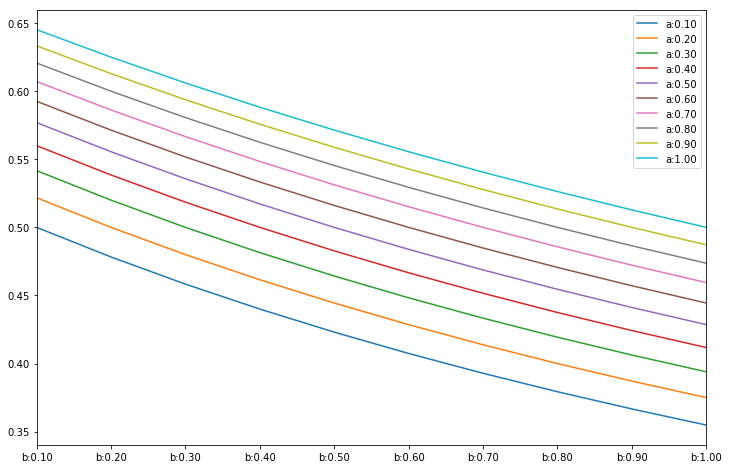

In [18]:
mixes.T.plot.line(figsize=(12, 8))